In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import statsmodels.api as sm
import scipy.optimize as scopt
import os
%matplotlib inline

c:\users\evergreen\appdata\local\programs\python\python36-32\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#load data
stocks = pd.read_csv(os.path.join('data2','sp500_closes-12.10.2017.csv'),index_col=0)
stock_list = stocks.columns.tolist()
print("^GSPC and stocks:\n",stock_list)
#print(stocks.head())
print("Stocks shape:",stocks.shape)
#print(stocks.describe())

^GSPC and stocks:
 ['MMM', 'ABT', 'ABBV', 'ACN', 'ATVI', 'AYI', 'ADBE', 'AMD', 'AAP', 'AES', 'AET', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'APC', 'ADI', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'ADM', 'ARNC', 'AJG', 'AIZ', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BHGE', 'BLL', 'BAC', 'BK', 'BCR', 'BAX', 'BBT', 'BDX', 'BRK.B', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BWA', 'BXP', 'BSX', 'BHF', 'BMY', 'AVGO', 'BF.B', 'CHRW', 'CA', 'COG', 'CDNS', 'CPB', 'COF', 'CAH', 'CBOE', 'KMX', 'CCL', 'CAT', 'CBG', 'CBS', 'CELG', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CHK', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'GLW', 'COST', 'COTY', 'CCI', 'CS

In [3]:
#load distance
distances = pd.read_csv(os.path.join('data2','pca500-distance.csv'),index_col=0)
selected_stock_list = distances.index.tolist()
print("Selected and favoraite stocks:\n",selected_stock_list)

print("Distance shape:",distances.shape)
print("Distance head:\n",distances.head())
#print(stocks.describe())
num_stocks = len(selected_stock_list)

Selected and favoraite stocks:
 ['APA', 'CHK', 'NEM', 'FCX', 'DVN', 'MOS', 'RRC', 'EXC', 'NFX', 'MRO', 'ARNC', 'NOV', 'AIG', 'C', 'NRG', 'FE', 'NBL', 'LUK', 'HPQ', 'APC', 'HES', 'RL', 'AMD', 'FLR', 'FTI', 'VIAB', 'BAC', 'OXY', 'JEC', 'JNPR', 'MGM', 'CTL', 'AES', 'DISCA', 'MAT', 'BBY', 'COP', 'BHGE', 'PRGO', 'GPS', 'ETFC', 'SRCL', 'KSS', 'M', 'IBM', 'NTAP', 'WYNN', 'FLS', 'NVDA', 'EQT', 'AAPL']
Distance shape: (51, 6)
Distance head:
          PCA1      PCA2      PCA3      PCA4      PCA5  Distance
APA -0.639347  0.259524 -0.531898 -0.323917 -0.263473  1.610015
CHK -0.589443  0.245435 -0.717297 -0.027842 -0.046916  1.558594
NEM -0.552846 -0.167523  0.012832 -0.602370 -0.381328  1.517874
FCX -0.508427  0.416629 -0.564571 -0.386398 -0.227312  1.513778
DVN -0.533611  0.201010 -0.731674 -0.035740 -0.165281  1.497411


In [4]:
#get selected stocks data
data = stocks[selected_stock_list]
print("Data shape: ", data.shape)
print("Data describe():\n", data.describe())

Data shape:  (2519, 51)
Data describe():
                APA          CHK          NEM          FCX          DVN  \
count  2519.000000  2519.000000  2519.000000  2519.000000  2519.000000   
mean     76.265895    19.000859    37.252519    26.140695    57.472423   
std      21.038075    10.121561    11.515784    11.022404    16.069033   
min      33.111366     1.590000    15.395187     3.740000    18.277044   
25%      59.535692    13.057154    26.498153    15.005014    47.815149   
50%      77.677505    19.227114    37.557098    28.482782    57.243565   
75%      90.953167    24.309543    45.635046    33.678377    64.530052   
max     131.638153    59.329266    65.662872    49.485542   110.422318   

               MOS          RRC          EXC          NFX          MRO  \
count  2519.000000  2519.000000  2519.000000  2519.000000  2519.000000   
mean     45.881483    51.650060    33.292316    39.408285    21.830406   
std      18.661048    17.535696     7.391183    13.538386     7.43288

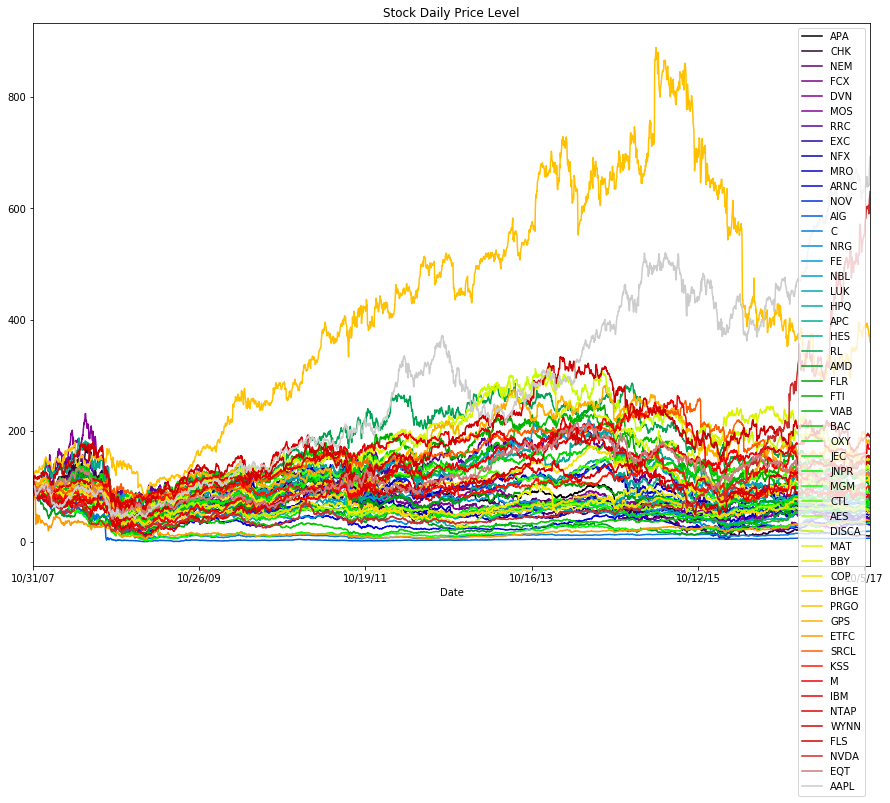

In [5]:
#normalize data to start with 100 level

ndata = (data / data.iloc[0] * 100)
ndata.plot(title="Stock Daily Price Level",cmap='nipy_spectral',figsize=(15, 10))


In [6]:
#we are going to use minimize function to optimize portfolio
def portfolio(weights):
    ''' Parameters 
    weights : array, weights for different stocks
    
    Returns
    p_return : float,  portfolio return
    p_volatility : float,  portfolio volatility
    p_return_to_risk : float, Sharpe ratio for rf=0
    '''
    weights = np.array(weights)
    p_return = np.sum(s_returns.mean() * weights) * 252
    p_volatility = np.sqrt(np.dot(weights.T, np.dot(s_returns.cov() * 252, weights)))
    p_return_to_risk = p_return/p_volatility
    return np.array([p_return, p_volatility, p_return_to_risk])

#Minimize loss
def objective(weights):
    return -portfolio(weights)[2]

#constrain,total normalized weights equal to 1
def constrain1(x):
    return ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

#weights are bound to be within 0 and 1.
bnds = tuple((0, 1) for x in range(num_stocks))



In [7]:
#we start with equal weights
weights = np.array(num_stocks * [1. / num_stocks,])
#returen
s_returns = np.log(data / data.shift(1))
# expected portfolio variance
p_volatility=np.dot(weights.T, np.dot(s_returns.cov() * 252, weights))
p_volatility


0.08122729609989085

In [8]:
%%time
p_returns = []
p_volatilities = []
for p in range (2500):
    weights = np.random.random(num_stocks)
    weights /= np.sum(weights)
    p_returns.append(np.sum(s_returns.mean() * weights) * 252)
    p_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(s_returns.cov() * 252, weights))))
p_returns = np.array(p_returns)
p_volatilities = np.array(p_volatilities)

Wall time: 1min 44s


In [9]:
%%time
solution = scopt.minimize(objective, num_stocks * [1. / num_stocks,], method='SLSQP',bounds=bnds, constraints=cons)

Wall time: 15.5 s


In [10]:
solution

     fun: -0.6625787503133903
     jac: array([  7.82212533e-01,   1.37574170e+00,   3.02469656e-01,
         1.09680877e+00,   7.58344002e-01,   9.28860947e-01,
         8.19655970e-01,   3.52807708e-01,   7.65824579e-01,
         7.55439140e-01,   1.01085233e+00,   7.62861408e-01,
         1.68937888e+00,   1.31241367e+00,   5.67362554e-01,
         3.17842178e-01,   5.66640317e-01,   7.60166965e-01,
         3.48955929e-01,   5.56785494e-01,   6.51377566e-01,
         2.69806884e-01,   6.86804697e-01,   7.38729663e-01,
         4.39656086e-01,   5.51664159e-01,   8.42038609e-01,
         3.64454441e-01,   7.24040359e-01,   6.15529120e-01,
         1.07660864e+00,   3.05266850e-01,   6.15573786e-01,
         2.78064936e-01,   2.63581052e-01,   2.48592839e-01,
         3.36491950e-01,   7.14765690e-01,  -4.07174230e-04,
         1.28335945e-01,   1.08386555e+00,   1.82185173e-01,
         3.52330238e-01,   5.94000623e-01,   9.67940167e-02,
         3.17629255e-01,   4.88169685e-01,   

In [11]:
#get stock weight with highest return/risk

suggested_weights=solution['x'].round(3)
print ("Stock weights from optimization:\n ",suggested_weights)
distances['Weights']=suggested_weights
print("\nSuggested Stocks and weights:\n",distances.loc[distances['Weights'] > 0])

Stock weights from optimization:
  [ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.274  0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.093  0.     0.634]

Suggested Stocks and weights:
           PCA1      PCA2      PCA3      PCA4      PCA5  Distance  Weights
PRGO  0.632175  0.672455  0.115291  0.235200 -0.071966  0.724998    0.274
NVDA  0.689059 -0.561500 -0.039524 -0.394727  0.171662  0.640788    0.093
AAPL  0.953105  0.022358  0.141303 -0.084080 -0.008839  0.000000    0.634


In [12]:
#get resturn, valitility, and sharpe ratio
portfolio(solution['x']).round(3)

array([ 0.175,  0.264,  0.663])